## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [39]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

/var/folders/g6/0bc2_tl1389c2rmm69jgtcr00000gn/T/ipykernel_11084/3532433508.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

In [40]:
contrib.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

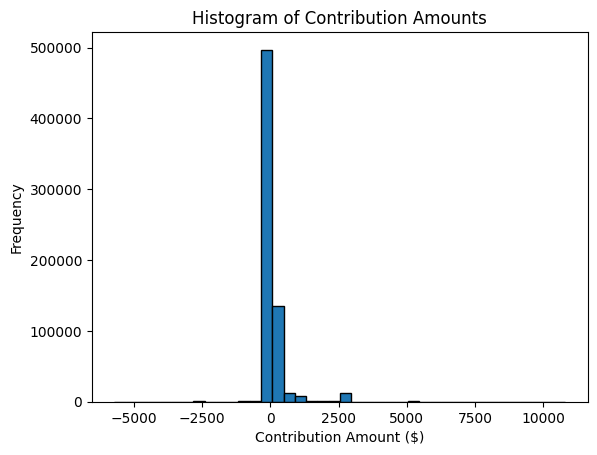

In [41]:
# 1a YOUR CODE HERE
plt.hist(contrib['contb_receipt_amt'], bins=40, edgecolor='black')
plt.title('Histogram of Contribution Amounts')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')
plt.show()

- **1a answer here:**
0 dollar contribution has the highest frequency

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

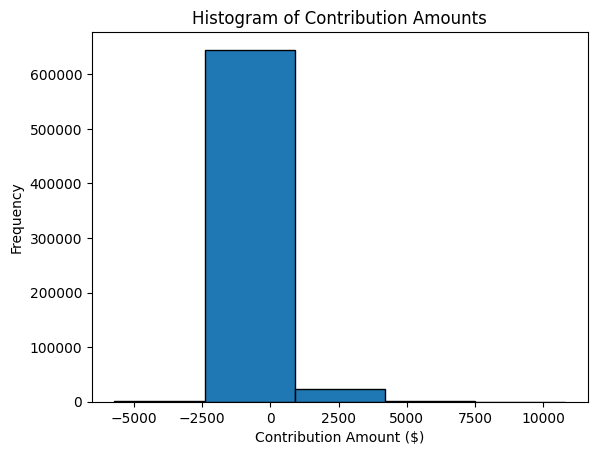

In [42]:
# 1b YOUR CODE HERE
# 1a YOUR CODE HERE
plt.hist(contrib['contb_receipt_amt'], bins=5, edgecolor='black')
plt.title('Histogram of Contribution Amounts')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')
plt.show()

- **1b answer here:** it seems that the frequency of almost -2500 and 950ish is all equivalent

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

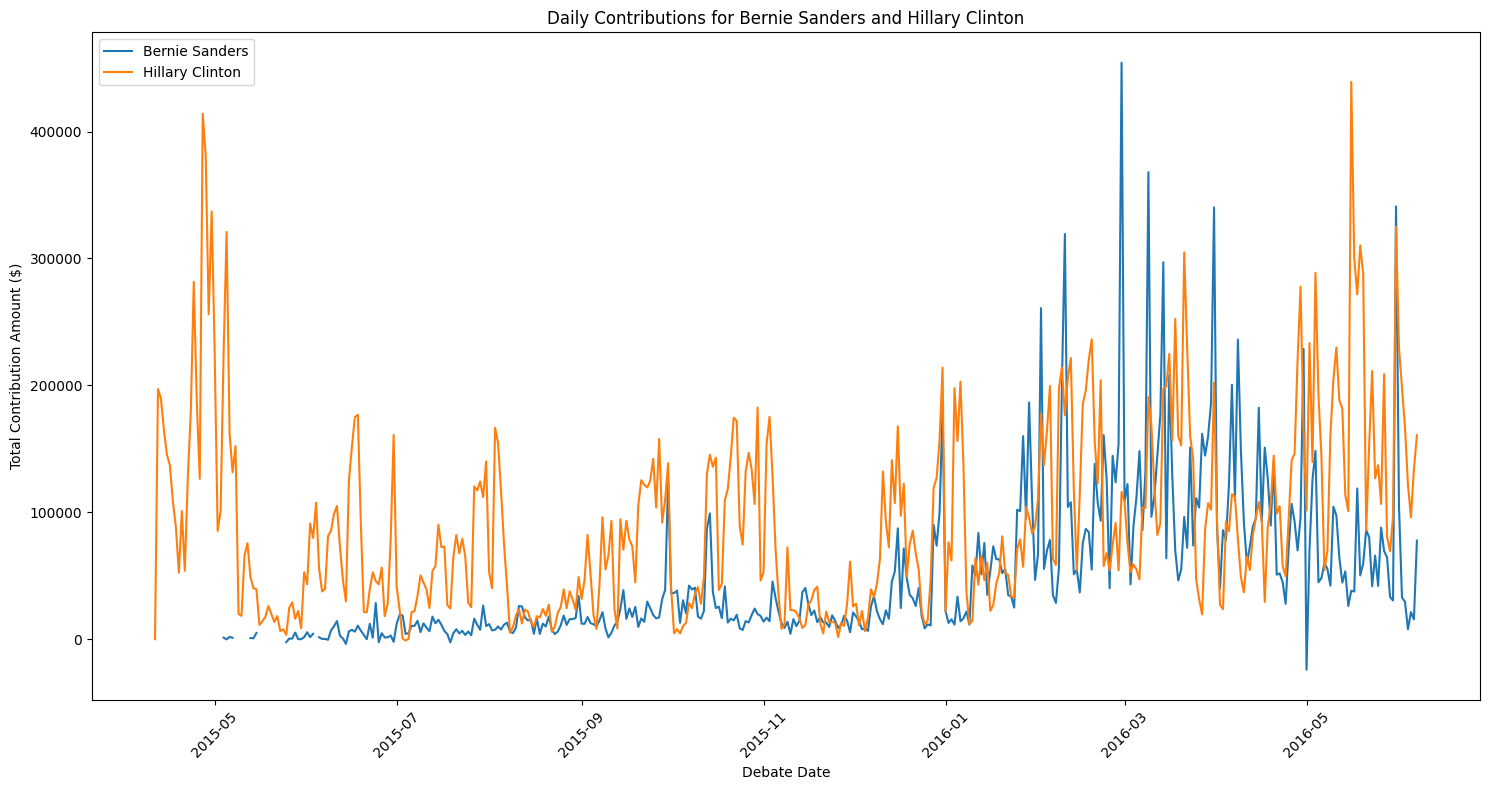

In [43]:
# 1c YOUR CODE HERE
daily_contrib = contrib.groupby(['cand_nm', 'contb_receipt_dt'])['contb_receipt_amt'].sum().unstack(level=0)
plt.figure(figsize=(15, 8))
plt.plot(daily_contrib.index, daily_contrib['Sanders, Bernard'], label='Bernie Sanders')
plt.plot(daily_contrib.index, daily_contrib['Clinton, Hillary Rodham'], label='Hillary Clinton')

# Add vertical lines for debate dates
debate_dates = ['2016-01-17', '2016-02-11', '2016-03-09']
#for date in debate_dates:
#    plt.axvline(x=pd.to_datetime(date), color='r', linestyle='--', alpha=0.5)

plt.title('Daily Contributions for Bernie Sanders and Hillary Clinton')
plt.xlabel('Debate Date')
plt.ylabel('Total Contribution Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **1c answer here:** 

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [44]:
# 2a YOUR CODE HERE
donation_counts = contrib.groupby('cand_nm')['contb_receipt_amt'].count().sort_values(ascending=False)
print("Number of donations per candidate:")
donation_counts

Number of donations per candidate:


cand_nm
Sanders, Bernard             379284
Clinton, Hillary Rodham      171104
Cruz, Rafael Edward 'Ted'     56355
Carson, Benjamin S.           27015
Rubio, Marco                  13267
Fiorina, Carly                 4679
Paul, Rand                     4164
Trump, Donald J.               3806
Bush, Jeb                      3056
Kasich, John R.                2957
Walker, Scott                   666
Huckabee, Mike                  531
O'Malley, Martin Joseph         392
Lessig, Lawrence                353
Christie, Christopher J.        333
Graham, Lindsey O.              305
Stein, Jill                     180
Webb, James Henry Jr.           106
Perry, James R. (Rick)          104
Santorum, Richard J.             85
Johnson, Gary                    68
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: contb_receipt_amt, dtype: int64

- **2a answer here:** Bernie Sanders

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [45]:
# 2b YOUR CODE HERE
donation_totals = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)
print("\nTotal value of donations per candidate:")
donation_totals


Total value of donations per candidate:


cand_nm
Clinton, Hillary Rodham     38,969,122.68
Sanders, Bernard            19,062,998.80
Cruz, Rafael Edward 'Ted'    5,926,568.27
Rubio, Marco                 4,998,700.92
Bush, Jeb                    3,316,836.83
Carson, Benjamin S.          3,022,105.15
Fiorina, Carly               1,473,989.42
Kasich, John R.              1,471,417.54
Trump, Donald J.               868,672.16
Paul, Rand                     721,563.14
Walker, Scott                  492,706.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             379,495.00
O'Malley, Martin Joseph        297,334.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               148,032.52
Webb, James Henry Jr.           76,568.16
Santorum, Richard J.            36,329.88
Johnson, Gary                   31,787.80
Pataki, George E.               30,450.00
Stein, Jill                     25,841.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

- **2b answer here:** Hillary Rodham Clinton

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [46]:
# 2c YOUR CODE HERE
donation_df = pd.DataFrame({
    'Donation_Count': donation_counts,
    'Total_Donation_Value': donation_totals
})
print("\nCombined donation information:")
donation_df


Combined donation information:


,Donation_Count,Total_Donation_Value
cand_nm,,
"Bush, Jeb",3056,"3,316,836.83"
"Carson, Benjamin S.",27015,"3,022,105.15"
"Christie, Christopher J.",333,"456,066.00"
"Clinton, Hillary Rodham",171104,"38,969,122.68"
"Cruz, Rafael Edward 'Ted'",56355,"5,926,568.27"
"Fiorina, Carly",4679,"1,473,989.42"
"Gilmore, James S III",3,"8,100.00"
"Graham, Lindsey O.",305,"379,495.00"
"Huckabee, Mike",531,"230,890.60"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [47]:
# 2d YOUR CODE HERE
donation_df['Average_Donation'] = donation_df['Total_Donation_Value'] / donation_df['Donation_Count']
donation_df_sorted = donation_df.sort_values('Average_Donation', ascending=False)
print("\nDonation information with average, sorted by average donation:")
donation_df_sorted


Donation information with average, sorted by average donation:


,Donation_Count,Total_Donation_Value,Average_Donation
cand_nm,,,
"Gilmore, James S III",3,"8,100.00","2,700.00"
"Perry, James R. (Rick)",104,"208,400.00","2,003.85"
"Pataki, George E.",20,"30,450.00","1,522.50"
"Christie, Christopher J.",333,"456,066.00","1,369.57"
"Graham, Lindsey O.",305,"379,495.00","1,244.25"
"Bush, Jeb",3056,"3,316,836.83","1,085.35"
"O'Malley, Martin Joseph",392,"297,334.26",758.51
"Jindal, Bobby",31,"23,231.26",749.40
"Walker, Scott",666,"492,706.90",739.80


- **2d answer here:** Gilmore, James S III	

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

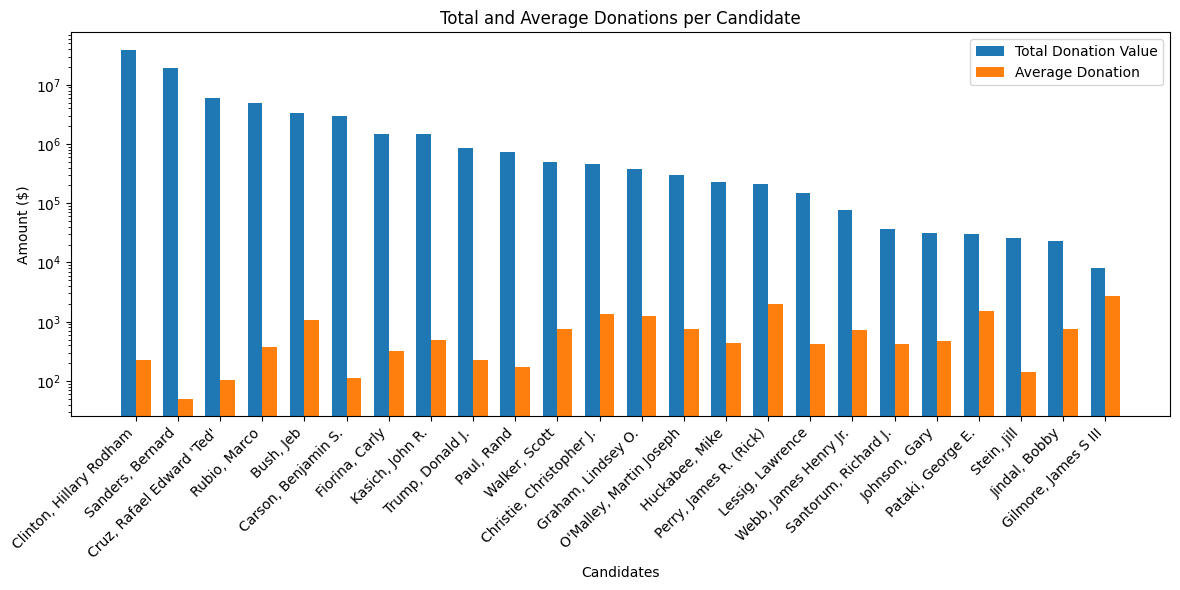

In [48]:
# 2e YOUR CODE HERE
plt.figure(figsize=(12, 6))
donation_df_sorted = donation_df.sort_values('Total_Donation_Value', ascending=False)
x = range(len(donation_df_sorted))
width = 0.35

plt.bar(x, donation_df_sorted['Total_Donation_Value'], width, label='Total Donation Value')
plt.bar([i + width for i in x], donation_df_sorted['Average_Donation'], width, label='Average Donation')

plt.xlabel('Candidates')
plt.ylabel('Amount ($)')
plt.title('Total and Average Donations per Candidate')
plt.xticks([i + width/2 for i in x], donation_df_sorted.index, rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** It seems that the Democrats have received the majority of contributions, and the highest value of contributions in the 2016 race. Conservatives on average, seemed to have richer donors. They have less donors, but higher average contributions, compared to Democrats with more donors, but lesser average contributions. 

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [49]:
# 3a YOUR CODE HERE
clinton_donors = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']
clinton_top_occupations = clinton_donors['contbr_occupation'].value_counts().head()
print("Top 5 occupations of Hillary Clinton donors:")
clinton_top_occupations

Top 5 occupations of Hillary Clinton donors:


contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64

**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [50]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    return df['contbr_occupation'].value_counts().head()

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [51]:
# 3c YOUR CODE HERE
candidates = ['Clinton, Hillary Rodham', 'Sanders, Bernard', 'Trump, Donald J.']
for candidate in candidates:
    subset = contrib[contrib['cand_nm'] == candidate]
    print(f"\nTop 5 occupations for {candidate} donors:")
    print(get_donors(subset))


Top 5 occupations for Clinton, Hillary Rodham donors:
contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64

Top 5 occupations for Sanders, Bernard donors:
contbr_occupation
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: count, dtype: int64

Top 5 occupations for Trump, Donald J. donors:
contbr_occupation
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: count, dtype: int64


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [52]:
# 3d YOUR CODE HERE
all_candidates_donors = contrib.groupby("cand_nm").apply(get_donors)
all_candidates_donors

/var/folders/g6/0bc2_tl1389c2rmm69jgtcr00000gn/T/ipykernel_11084/3997205479.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_candidates_donors = contrib.groupby("cand_nm").apply(get_donors)


cand_nm                    contbr_occupation                     
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** Retired seems to be one of the top most occupations, that definitely tracks since retired people often want to leave the world better for their kids/other motivations and have financial means. Unemployed by far being the greatest type of donor for Sanders means that his economic inequality messaging really got through. Also interesting that a lot of CEOs voted for Trump, showing Trump's inclination to support corporations and his businessman side. 

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** Yes, the insight of conservative donors being richer than liberal donors is clearly correlated with the types of occupations they hold here. Definitely tracks vice versa as well. 

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k